# Drone-based Pollution Cleanup Optimization

### Algorithm Design Course Project

### Student Name: Claude Watson
### Date: March 24, 2025

# Introduction

This project explores algorithmic strategies for optimizing a drone’s mission to clean pollution hotspots within a limited energy budget. Each hotspot is defined by a priority value (reflecting its importance), a cleaning energy requirement, and a travel energy cost. The goal is to maximize the total priority score the drone can achieve before running out of energy.

Two algorithmic approaches were implemented and analyzed:



1.   Brute Force – which explores all possible subsets of hotspots to find the globally optimal solution.
2.   Greedy Optimization – which selects hotspots based on the highest priority-to-energy ratio, favoring efficiency over completeness.



By comparing execution time, solution quality, and scalability, this project highlights the trade-offs between guaranteed optimality and practical runtime performance.

In [24]:
# Problem Dataset (100 Hotspots)

hotspots = [(1, 90, 40, 20), (2, 70, 30, 10), (3, 120, 80, 25), (4, 60, 20, 30), (5, 100, 50, 15),
            (6, 80, 60, 20), (7, 150, 70, 30), (8, 50, 25, 10), (9, 110, 55, 18), (10, 95, 45, 22),
            (11, 85, 35, 12), (12, 130, 90, 28), (13, 75, 40, 16), (14, 105, 60, 24), (15, 65, 30, 14),
            (16, 115, 70, 26), (17, 55, 20, 8), (18, 140, 85, 32), (19, 100, 50, 20), (20, 125, 75, 30),
            (21, 80, 50, 14), (22, 68, 38, 1), (23, 114, 74, 18), (24, 67, 27, 22), (25, 94, 50, 15),
            (26, 78, 70, 11), (27, 156, 77, 38), (28, 52, 19, 0), (29, 116, 64, 17), (30, 104, 52, 28),
            (31, 91, 35, 3), (32, 138, 98, 36), (33, 78, 30, 18), (34, 108, 50, 29), (35, 58, 39, 9),
            (36, 113, 78, 30), (37, 63, 21, 0), (38, 148, 83, 42), (39, 108, 43, 15), (40, 117, 70, 24),
            (41, 90, 48, 13), (42, 71, 39, 17), (43, 112, 90, 21), (44, 65, 28, 35), (45, 101, 50, 5),
            (46, 71, 57, 17), (47, 148, 78, 21), (48, 50, 24, 3), (49, 109, 52, 27), (50, 91, 49, 16),
            (51, 91, 35, 17), (52, 135, 87, 31), (53, 72, 34, 23), (54, 114, 50, 27), (55, 62, 38, 6),
            (56, 111, 69, 19), (57, 61, 24, 2), (58, 131, 92, 23), (59, 92, 56, 24), (60, 117, 85, 22),
            (61, 80, 36, 23), (62, 79, 36, 3), (63, 129, 71, 26), (64, 56, 16, 28), (65, 109, 59, 12),
            (66, 88, 53, 21), (67, 140, 72, 35), (68, 54, 24, 2), (69, 110, 50, 16), (70, 101, 41, 24),
            (71, 86, 35, 2), (72, 120, 86, 29), (73, 67, 45, 13), (74, 111, 70, 25), (75, 60, 27, 15),
            (76, 106, 74, 25), (77, 58, 23, 1), (78, 131, 78, 42), (79, 93, 50, 14), (80, 127, 72, 21),
            (81, 97, 40, 13), (82, 75, 20, 3), (83, 120, 81, 27), (84, 66, 25, 32), (85, 106, 45, 14),
            (86, 79, 70, 29), (87, 153, 77, 32), (88, 46, 31, 11), (89, 109, 54, 10), (90, 93, 49, 29),
            (91, 77, 32, 3), (92, 122, 85, 25), (93, 76, 49, 8), (94, 115, 52, 20), (95, 75, 36, 23),
            (96, 108, 70, 19), (97, 60, 16, 15), (98, 134, 92, 38), (99, 108, 51, 14), (100, 123, 65, 33)]


battery_capacity = 1000

# a) Solution Description - Brute Force Approach

The brute force approach evaluated each possible subset of the given hotspots to determine which combination gives te best total priority score without going over the energy capacity of the drone. For each subset, the algorithm simulates the drones behavior. For every hotspot, it deducts the round trip travel energy and determines if it can be fully or partially cleaned. If there is not enough energy to even get to the next hotspot, the drone skips it. After considering all subsets, the algorithm selects the one with the highest total priority score. This brute force method guarantees the optimal solution exploring the entire solution space.

```
Psuedo:

BruteMaxPriority(hotspots, batteryCap)

  bestScore = 0
  bestSubset = []

  for each subset in all of hotspots
    totalEnergy = 0
    totalScore = 0
    currentSubset = []

    for each hotspot in subset
      energyNeeded = hotspot.cleanEnergy + hotspot.travelEnergy


      // fully clean hotspot
      if totalEnergy + energyNeeded <= batteryCap
        totalEnergy += energyNeeded
        totalScore += hotspot.priority
        add hotspot to currentSubset

      // partially clean hotspot
      else if totalEnergy + hotspot.travelEnergy < batteryCap
        remainingEnergy = batteryCap - (totalEnergy + hotspot.travelEnergy)
        cleanedFraction = remainingEnergy / hotspot.cleanEnergy
        partialScore = hotspot.priority * cleanedFraction
        totalEnergy += hotspot.travelEnergy + remainingEnergy
        totalScore += partialScore
        add partially cleaned hotspot to currentSubset

    if totalScore > bestScore
      bestScore = totalScore
      bestSubset = currentSubset

  return bestScore, bestSubset





# b) Complexity Analysis - Brute Force

# **Time Complexity**
The brute force algorithm performs the following steps:


1.   Generates all the possible subsets in the hotspot list
2.   For each subset, it may iterate through n hotspots to consider the best combination for max score and best energy use

To generate all the possible subsets takes O(2^n) time, and to iterate through n hotspots takes O(n) time.

Therefore, we can conclude that the total time complxity for this algorithm is O(n * 2^n)

# **Space Complexity**

The algorithm tracks:


*   The current subset being evaluated, O(n)
*   The list of best subsets at a point, O(n)
*   The variables totalEnergy etc take constant space

From this, we can conclude the space complexity is O(n)

# **Graph: Time v. Input Size**

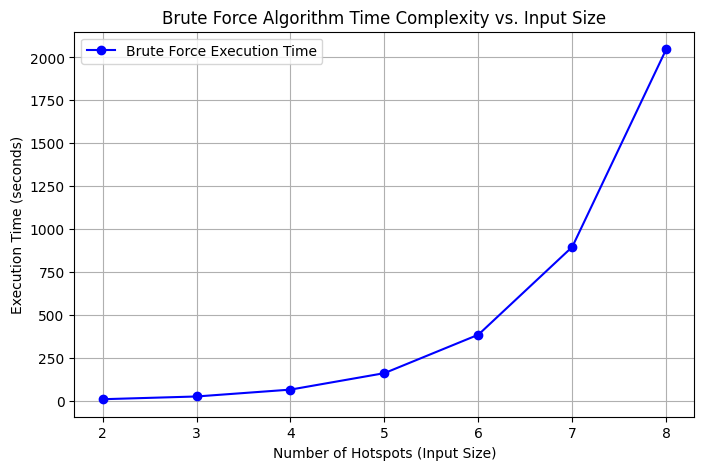

In [25]:
import matplotlib.pyplot as plt
import math

# Example input sizes and corresponding times (replace with actual measured times)
input_sizes = [2, 3, 4, 5, 6, 7, 8]  # Number of hotspots
time_taken = [2 * math.pow(2,2), 3 * math.pow(2,3), 4 * math.pow(2,4), 5 * math.pow(2,5), 6 * math.pow(2,6), 7 * math.pow(2,7), 8 * math.pow(2,8)]  # Example times in seconds

plt.figure(figsize=(8,5))
plt.plot(input_sizes, time_taken, marker='o', linestyle='-', color='b', label='Brute Force Execution Time')
plt.xlabel('Number of Hotspots (Input Size)')
plt.ylabel('Execution Time (seconds)')
plt.title('Brute Force Algorithm Time Complexity vs. Input Size')
plt.legend()
plt.grid(True)
plt.show()

# **Graph Details**
This graph demonstrates the theorectial time complexity of the brute force approach as the number of hotspots (n) increases. The x-axis represents the input size, while the y-axis shows the calculated execution time in seconds. The time values are modeled using the formula n * 2^n, which reflects the time complexity of the brute force algorithm.
As shown in the graph, execution time increases very gradually for small input sizes but rapidly grows as the input size increases. This sudden growth is noticeable starting around 4-6 hotspots. By the time the input size reaches 6, the simulated time jumps to around 350 seconds. This steep curve demonstrates how expensive the brute force becomes as the number of hotspots increases. This confirms that even though the brute force is accurate, it is only practical for small datasets and becomes inefficient for larger input sizes.

# c) Proof of Correctness - Brute Force


We can use loop invariant to prove the correctness of the bruteforce algorithm. We will focus on the inner for loop that processes each hotspot in subset. This is the core of how we will compute energy use and update the score.


# **Loop invariant:**
At the beginning of each iteration of the inner loop, the variables totalEnergy, totalScore and currentSubset contain the correct energy spent, priority aquired and the list of cleaned or partially cleaning hotspots for all previously visited hotspots in the subset.

`Initialization:`
Before the first iteration of the loop, totalEnergy, totalScore and currentSubset are all 0 or empty. these values correctly reflect that no hotspots have been visited yet.

`Maintenance:`
During each iteration:
             

*   If the drone has enough energy for a full cleaning, it adds the hotspots's full energy cost and priority score to the totals.
*   If only partial cleaning is possible, the drone calculates the remaining energy, calculates the fraction cleaned and then adds it to the partial score to the total score.
*   In both cases, the energy and score values are updated correctly and the hotspot is added to currentSubset, with the appropriate information.
            

`Termination:`
When the loop finishes, all the hotspots in thee subset have been processed.


*   totalEnergy represents the actual energy used.
*   totalScore reflects the correct total priority earned
*   currentSubset reflects lists which hotspots were clean, whether partially or wholly.


# **Conclusion:**
By the principle loop invariant, we have proved that the algorithm correctly computes the energy usage, priority score and hotspots cleaned. Since the outer loop considers all possible subsets and the best scoring one is selected, we can assume the brute force approach is correct.



# d) Implementation - Brute Force Solution
Implement and comment your brute force solution here.

In [26]:
from itertools import chain, combinations

# including the first 20 of 100 hotspots for later computing
hotspots_20 =  [(1, 90, 40, 20), (2, 70, 30, 10), (3, 120, 80, 25), (4, 60, 20, 30), (5, 100, 50, 15),
            (6, 80, 60, 20), (7, 150, 70, 30), (8, 50, 25, 10), (9, 110, 55, 18), (10, 95, 45, 22),
            (11, 85, 35, 12), (12, 130, 90, 28), (13, 75, 40, 16), (14, 105, 60, 24), (15, 65, 30, 14),
            (16, 115, 70, 26), (17, 55, 20, 8), (18, 140, 85, 32), (19, 100, 50, 20), (20, 125, 75, 30)]

# battery Capacity
batteryCap = 1000

# helper function to generate all subsets
def generateSubsets(hotspots_20):
    return chain.from_iterable(combinations(hotspots_20, r) for r in range(1, len(hotspots_20)+1)) # returns all possible combinations of the 20 hotspots

# brute force algorithm
def maxPriorityBrute(hotspots_20, battery_capacity):
    # initializing the empty list and best score to 0
    bestScore = 0
    bestSubset = []

    # for loop to iterate through each subset
    for subset in generateSubsets(hotspots_20):
        # initializing values to 0 or empty set
        totalEnergy = 0
        totalScore = 0
        currentSubset = []

        # loop to access hotspot in the subset
        for hotspot in subset:
            hotspot_id, priority, cleaning, travel = hotspot # gathering values from the subset
            energyNeeded = cleaning + travel  # total energy needed for travelling to & from hotspot and cleaning

            # cleaning the entire hotspot if possible
            if totalEnergy + energyNeeded < batteryCap:
                # updating the values accordingly
                totalEnergy += energyNeeded
                totalScore += priority
                currentSubset.append((hotspot_id, "Full Clean", priority, cleaning, travel)) # adding the cleaned spot to the subset

            # if full cleaning is not possible, partially clean
            elif totalEnergy + travel < batteryCap:
                # calculate the remaining energy and fraction that can be cleaned
                remainingEnergy = batteryCap - totalEnergy - travel
                fraction = remainingEnergy / cleaning
                partialScore = priority * fraction
                # updating the values and appending to the list
                totalEnergy += travel + remainingEnergy
                totalScore += partialScore
                currentSubset.append((hotspot_id, f"{fraction:.2%} Clean", partialScore, remainingEnergy, travel))

        # Update best score if the current subset is better and update the best subset
        if totalScore > bestScore:
            bestScore = totalScore
            bestSubset = currentSubset

    # return values
    return bestScore, bestSubset

# running the algorithm on the first 20 hotspots
score, subset = maxPriorityBrute(hotspots_20, batteryCap)


# printing the result
print("\nBest Priority Score Achieved:", round(score, 2))
print("\nBest Subset of Hotspots Visited:")
for entry in subset:
    print(f"Hotspot {entry[0]} - {entry[1]} | Score: {round(entry[2], 2)} | "
          f"Clean Energy: {round(entry[3], 2)} | Travel: {entry[4]}")


Best Priority Score Achieved: 1420.0

Best Subset of Hotspots Visited:
Hotspot 1 - Full Clean | Score: 90 | Clean Energy: 40 | Travel: 20
Hotspot 2 - Full Clean | Score: 70 | Clean Energy: 30 | Travel: 10
Hotspot 5 - Full Clean | Score: 100 | Clean Energy: 50 | Travel: 15
Hotspot 7 - Full Clean | Score: 150 | Clean Energy: 70 | Travel: 30
Hotspot 8 - Full Clean | Score: 50 | Clean Energy: 25 | Travel: 10
Hotspot 9 - Full Clean | Score: 110 | Clean Energy: 55 | Travel: 18
Hotspot 10 - Full Clean | Score: 95 | Clean Energy: 45 | Travel: 22
Hotspot 11 - Full Clean | Score: 85 | Clean Energy: 35 | Travel: 12
Hotspot 13 - Full Clean | Score: 75 | Clean Energy: 40 | Travel: 16
Hotspot 15 - Full Clean | Score: 65 | Clean Energy: 30 | Travel: 14
Hotspot 16 - Full Clean | Score: 115 | Clean Energy: 70 | Travel: 26
Hotspot 17 - Full Clean | Score: 55 | Clean Energy: 20 | Travel: 8
Hotspot 18 - Full Clean | Score: 140 | Clean Energy: 85 | Travel: 32
Hotspot 19 - Full Clean | Score: 100 | Clean E

# e) Performance Testing - Brute Force
Run brute force on small datasets and collect timing data.
Plot graph of execution time vs. input size.

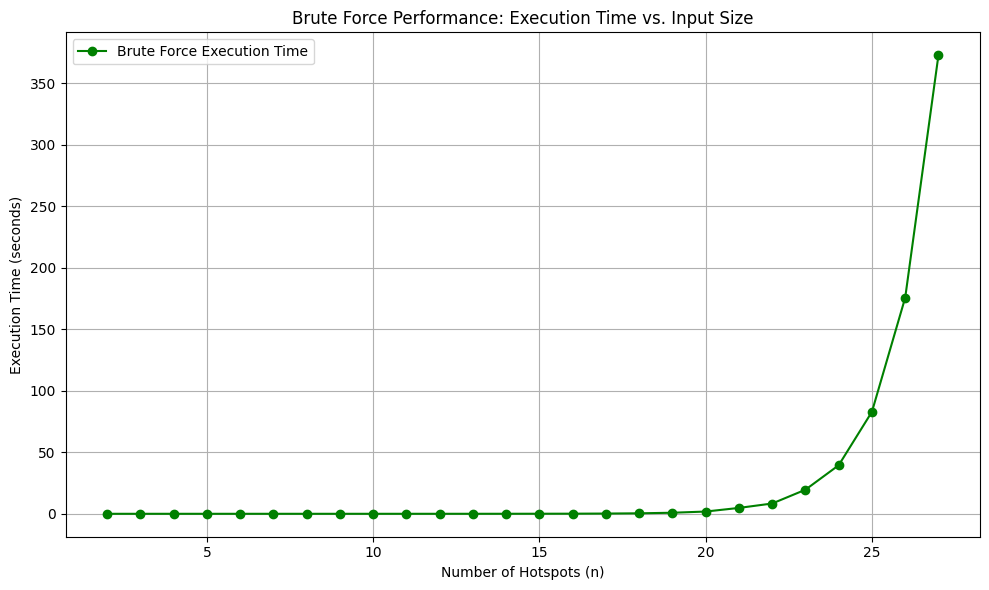

In [27]:
import matplotlib.pyplot as plt

# input sizes from 2 to 27
input_sizes = list(range(2, 28))

# manually collected execution times
execution_times = [
    0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0001, 0.0002, 0.0004, 0.0009, 0.0036,
    0.0055, 0.0097, 0.0223, 0.0534, 0.0886, 0.1934, 0.3983, 0.8577, 1.8293, 4.7745,
    8.3632, 19.5741, 39.4642, 82.9075, 175.5955, 372.6466
]

# plotting the collected data
plt.figure(figsize=(10, 6))
plt.plot(input_sizes, execution_times, marker='o', color='green', label='Brute Force Execution Time')
plt.title("Brute Force Performance: Execution Time vs. Input Size")
plt.xlabel("Number of Hotspots (n)")
plt.ylabel("Execution Time (seconds)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# **Graph Details**
This graph shows the actual execution time of the brute force algorithm as the number of input hotspots increases from 2 to 27. The x-axis represents the input size, while the y-axis represents the measured execution time in seconds. From the graph, the execution time remains very low and nearly flat for small input sizes (from 2 to around 22), but then increases dramatically beyond that point. Starting around n = 24, the curve becomes noticeably steeper, and by n = 27, the algorithm takes over 5 minutes to run. This rapid growth in runtime is due to the algorithm's exponential time complexity of O(2n⋅n), where the number of subsets grows exponentially with each additional input. The graph demonstrates how impractical the brute force is for large inputs and supports the need for a more efficient, optimized solution like a greedy algorithm.

# f) Optimal Algorithm Selection and Description

An optimized solution for this problem would be to use a greedy apporach. The greedy approach aims to tackle to hotspots with the most valuable priority-to-energy ratio first. The steps for the algorithm are listed below:

**`Initialization:`**
This involves calculating the ratio for each hotspot, sorting them in descending order, and initializing totalEnergy, totalScore = 0 and the cleanedSubset to [] (empty set).

**`Selection:`**
The algorithm iterates through the sorted list and selects the next most energy efficient hotspot that has not been selected.

**`Feasibility:`**
If the drone has enough energy to fully clean a hotspot, it does so and earns the full priority score. If the drone only has enough energy to travel to the hotspot, it uses the remaining energy to partially clean the hotspots and earn a partial score. If the drone doesn't have enough energy to even make the trip, it skips the hotspot and stops the process (feasibilty check).

**`Solution:`**
Once the algorithm has no more hotspots to consider, it returns the total score and a subset of the cleaned hotspots

# **Conclusion:**
This greedy strategy is much faster than brute force since it only processes each hotspot once and doesn’t consider all subsets.

# g) Complexity Analysis - Optimized Algorithm

# **Time Complexity**
The greedy algorithm performs the following steps:


1.   Computes the ratio (priority score to travel energy) for each hotspot.
2.   Sorts the hotspots by ratio in descending order.
3.   Iterates through the sorted list to calculate energy used.

To compute the ratio for a list of n items take O(n) time, to sort n hotspots takes O(n * log n), and to iterate through the hotspots takes O(n) time. Therefore, we can conclude that the total time complxity for this algorithm is *(n * log n)


# **Space Complexity**
The algorithm stores:


1.   The input list of hotspots ( O(1) because it already exsists)
2.   A sorted list with the same size as the input list O(n)
3.   A result list, subset with the cleaned hotspots, up to O(n)

From this, we can conclude the space complexity is O(n)

# **Graph Showing Complexity vs Input Size**



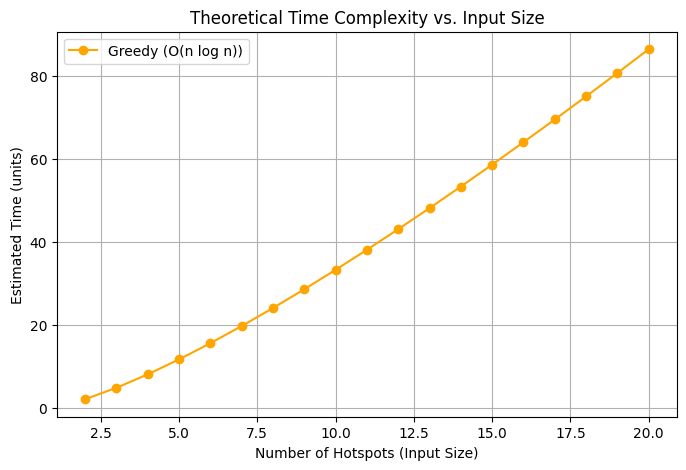

In [28]:
# Theoretical Time Complexity Graph for Greedy Algorithm
import matplotlib.pyplot as plt
import math

# Input sizes to simulate
input_sizes = list(range(2, 21))  # Input sizes from 2 to 20

# Simulated time based on O(n log n)
time_taken = [n * math.log2(n) for n in input_sizes]

# Plot using the template
plt.figure(figsize=(8,5))
plt.plot(input_sizes, time_taken, marker='o', linestyle='-', color='orange', label='Greedy (O(n log n))')
plt.xlabel('Number of Hotspots (Input Size)')
plt.ylabel('Estimated Time (units)')
plt.title('Theoretical Time Complexity vs. Input Size')
plt.legend()
plt.grid(True)
plt.show()

# h) Implementation - Optimized Algorithm
Implement and comment optimized solution here.

In [29]:
def maxPriorityGreedy(hotspots, batteryCap):

    # Initialization: sort by ratio in descending order and initialize variables
    ratioSorted = []
    # loop to iterate through each hotspot and calculate the ratio, then add it to the ratio list
    for hotspot in hotspots:
        hotspot_id, priority, cleaning, travel = hotspot
        ratio = priority / (cleaning + travel)
        ratioSorted.append(ratio)
    # sorts the list based on ratio (descending order)
    sorted_hotspots = sorted(zip(hotspots, ratioSorted), key=lambda x: x[1], reverse=True)

    # initializing variables
    totalEnergy = 0
    totalScore = 0
    cleanedSubset = []

    # Selection: iterating through the sorted list and selecting the first availble element, which has the highest ratio
    #loop to iterate through all the hotspots
    for (hotspot, _) in sorted_hotspots:
      hotspot_id, priority, cleaning, travel = hotspot


        # calculate the energy needed to travel from and back to the dock + cleaning energy
      energyNeeded = cleaning + travel

        # fully cleaning if there is enough energy
      if totalEnergy + energyNeeded <= batteryCap:

            # updating values and adding to the solution set
            totalEnergy += energyNeeded
            totalScore += priority
            cleanedSubset.append((hotspot_id, "Full Clean", priority, cleaning, travel))

        # if there is not enough energy to fully clean, partially clean
      elif totalEnergy + travel < batteryCap:

            # calculate the fraction that can be partially cleaned based on the remaining energy
            remainingEnergy = batteryCap - totalEnergy - travel
            cleanedFraction = remainingEnergy / cleaning
            partialScore = priority * cleanedFraction

            #updating values and adding to solution set
            totalEnergy += travel + remainingEnergy
            totalScore += partialScore
            cleanedSubset.append((hotspot_id, f"{cleanedFraction:.2%} Clean", partialScore, remainingEnergy, travel))

        # if it cannot travel to the next hotspot, skip it
      else:
            break

    # return the values
    return totalScore, cleanedSubset

# testing the algorithm
batteryCap = 1000
score, subset = maxPriorityGreedy(hotspots, batteryCap)

print(f"Total Priority Score: {round(score, 2)}")
print(f"Total Hotspots Cleaned: {len(subset)}")
for i in subset:
    print(f"Hotspot ID {i[0]} - {i[1]} | "
          f"Score: {round(i[2], 2)} | "
          f"Clean Energy: {round(i[3], 2)} | Travel: {i[4]}")

Total Priority Score: 1940.0
Total Hotspots Cleaned: 25
Hotspot ID 82 - Full Clean | Score: 75 | Clean Energy: 20 | Travel: 3
Hotspot ID 37 - Full Clean | Score: 63 | Clean Energy: 21 | Travel: 0
Hotspot ID 28 - Full Clean | Score: 52 | Clean Energy: 19 | Travel: 0
Hotspot ID 77 - Full Clean | Score: 58 | Clean Energy: 23 | Travel: 1
Hotspot ID 31 - Full Clean | Score: 91 | Clean Energy: 35 | Travel: 3
Hotspot ID 57 - Full Clean | Score: 61 | Clean Energy: 24 | Travel: 2
Hotspot ID 71 - Full Clean | Score: 86 | Clean Energy: 35 | Travel: 2
Hotspot ID 91 - Full Clean | Score: 77 | Clean Energy: 32 | Travel: 3
Hotspot ID 68 - Full Clean | Score: 54 | Clean Energy: 24 | Travel: 2
Hotspot ID 62 - Full Clean | Score: 79 | Clean Energy: 36 | Travel: 3
Hotspot ID 17 - Full Clean | Score: 55 | Clean Energy: 20 | Travel: 8
Hotspot ID 97 - Full Clean | Score: 60 | Clean Energy: 16 | Travel: 15
Hotspot ID 39 - Full Clean | Score: 108 | Clean Energy: 43 | Travel: 15
Hotspot ID 48 - Full Clean | Sc

# i) Performance Testing and Comparison
Run and compare brute force vs. optimized algorithms.
Collect timing data, plot comparison graph.

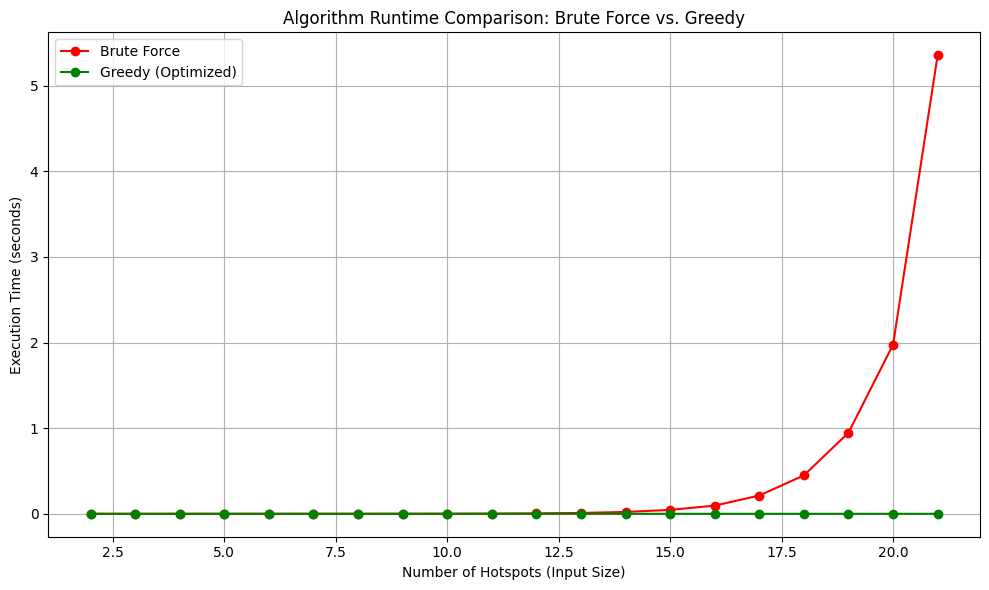

In [30]:
import time
import matplotlib.pyplot as plt

# defining the first 21 values to test
input_sizes = list(range(2, 22))  # From 2 to 21 hotspots

# initializing
brute_times = []
greedy_times = []

# run both algorithms and collect timings
for n in input_sizes:
    test_hotspots = hotspots[:n]

    # time brute force
    start = time.time()
    _ = maxPriorityBrute(test_hotspots, batteryCap)
    end = time.time()
    brute_times.append(end - start)

    # time greedy
    start = time.time()
    _ = maxPriorityGreedy(test_hotspots, batteryCap)
    end = time.time()
    greedy_times.append(end - start)

# plot the graph
plt.figure(figsize=(10, 6))
plt.plot(input_sizes, brute_times, marker='o', color='red', label='Brute Force')
plt.plot(input_sizes, greedy_times, marker='o', color='green', label='Greedy (Optimized)')
plt.xlabel('Number of Hotspots (Input Size)')
plt.ylabel('Execution Time (seconds)')
plt.title('Algorithm Runtime Comparison: Brute Force vs. Greedy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# **Graph Details**
This graph compares the execution times of the brute force algorithm and the greedy algorithm as the number of input increases from 2 to 21. The red line represents the brute force algorithm, and the green line represents the greedy algorithm. As we can see, the brute force algorithm has very low execution time for small input sizes but grows rapidly after around n = 15, demonstrating exponential behavior. By the time the input reaches n = 21, brute force takes over 4 seconds to complete. In contrast, the greedy algorithm maintains an almost constant execution time for all input sizes, completing nearly instantly for all inputs. This clear difference highlights the brute force algorithm's  inefficiency whe handling large inputs and reinforces the value of the greedy approach for large datasets. The graph demonstrates the trade-off between brute force accuracy and the greedy approaches performance (speed).

# Final Conclusion and Reflections

Throughout this project, I explored two different algorithmic approaches to solving this drone hotspots cleaning problem: brute force and greedy approaches. By designing, implementing, and testing both methods, I have developed a deeper understanding of how different algorithm design choices can directly affect performance, scalability and result quality.
The brute force approach evaluates all possible subsets of the hotspots, ensuring the best (most optimal) combination is selected based on priority and energy constraints. This approach guarantees the best solution, however, it comes with a very expensive computational cost. As the number of hotspots increase, the number of subsets grow exponentially. This exponential growth makes this algorithm highly inefficient for data sets with large inputs. With the help of a graph, I was able to demonstrate the sudden growth in computational time as the inputs increased.
In contrast, the greedy approach sorts the hotspots by their priority-to-energy ratio and chooses the best option at each step until the battery capacity is reached. This approach performs almost instantly even for large inputs due to the sorting step, which takes O(n log n) time. However, there is a drawback. Because the algorithm makes the decisions based on local efficiency, it may miss the globally optimal combination. Despite this fact, the plotted graphs showed that the greedy algorithm produced a near optimal result with a drastically reduced runtime, making it far more practical for real world use.
In summary, this project taught me the important of evaluating both the correctness and efficiency when designing algorithms. The brute force method offers accuracy at the price of speed, while the greedy approach provides scalability and speed with a slight compromise in result quality. Choosing between them depends on the size of the problem and whether optimality or responsiveness is more important.


# Part 2

# a). Optimal Algorithm Design Technique

For the pollution hotspot selection problem in Part II, I have chosen to use Dynamic Programming as the optimal algorithm design technique. The problem is a classic example of the 0/1 Knapsack Problem, which is solvable with DP. In this scenario, each hotspot can be considered an item with an associated weight (the total energy cost to fully clean and travel to/from the hotspot) and a value (its priority score). The drone acts as the knapsack with a total energy capacity of 1000 units per mission. The goal is to select a subset of hotspots such that the sum of their energy costs does not exceed 1000, and the total priority score is maximized. Importantly, partial cleaning is not allowed—each hotspot is either completely cleaned or not cleaned at all.

The dynamic programming approach involves building a two-dimensional table where each entry dp[i][e] represents the maximum total priority score that can be obtained by considering the first i hotspots with a total available energy of e. For each hotspot, we make a decision: either exclude it, or include it, adding its priority score to the optimal value achievable with the remaining energy. This choice is made for each hotspot and every possible energy value from 0 up to the drone's capacity. The solution is built up from simple base cases—no energy or no hotspots means a total score of zero. The process continues iteratively for all hotspots and all possible energy values, ensuring that each subproblem is solved only once and its result is reused whenever needed.

After filling in the DP table, the entry corresponding to all hotspots and the full energy budget (dp[N][1000]) contains the maximum achievable priority score. To recover the actual subset of hotspots that make up this optimal solution, we can backtrack through the table, checking for each hotspot whether including it led to a better result than excluding it. This systematic process ensures that the algorithm efficiently explores all feasible subsets of hotspots without redundant recalculations, making dynamic programming both optimal and practical for this task. Compared to a backtracking approach, which would enumerate all possible combinations and become computationally infeasible as the number of hotspots increases, dynamic programming dramatically reduces computation time and space through memoization and overlapping subproblems, making it the ideal choice for this problem.

# b). Dynamic Programming Pseudo

Input:
    hotspots: a list of (priority, cleaning_effort, travel_cost) for each hotspot
    battery_capacity: the maximum energy units available (e.g., 1000)

Output:
    max_priority: the maximum total priority score achievable
    selected_hotspots: the indices of hotspots included in the optimal subset

Procedure DP_Max_Priority(hotspots, battery_capacity):

    Let N = number of hotspots
    Create a 2D array DP of size (N+1) x (battery_capacity+1), initialized to 0
    Create a 2D array CHOICE of size (N+1) x (battery_capacity+1), initialized to False

    For i from 1 to N:
        priority = hotspots[i-1].priority
        cleaning = hotspots[i-1].cleaning_effort
        travel = hotspots[i-1].travel_cost
        total_cost = cleaning + travel

        For j from 0 to battery_capacity:
            If total_cost > j:
                DP[i][j] = DP[i-1][j]
                CHOICE[i][j] = False
            Else:
                If DP[i-1][j] > DP[i-1][j - total_cost] + priority:
                    DP[i][j] = DP[i-1][j]
                    CHOICE[i][j] = False
                Else:
                    DP[i][j] = DP[i-1][j - total_cost] + priority
                    CHOICE[i][j] = True

    # Reconstruct solution
    Set max_priority = DP[N][battery_capacity]
    Set selected_hotspots = empty list
    Set j = battery_capacity
    For i from N down to 1:
        If CHOICE[i][j] == True:
            Add (i-1) to selected_hotspots
            j = j - (hotspots[i-1].cleaning_effort + hotspots[i-1].travel_cost)

    Return max_priority, selected_hotspots

# c). Theoretical Time Complexity

> The dynamic programming solution for this problem uses a 2D table of size N × C, where N is the number of hotspots and C is the battery capacity (here, 1000). For each hotspot, we iterate through all possible energy values up to the battery limit. Thus, the overall time complexity is O(N × C).
>
> - In this project, C = 1000 is a constant, but in theoretical analysis, we leave it as a variable.
> - For each cell in the DP table, only a constant amount of work is done (comparison and assignment).
>
> The space complexity is also O(N × C) due to the DP and CHOICE tables.


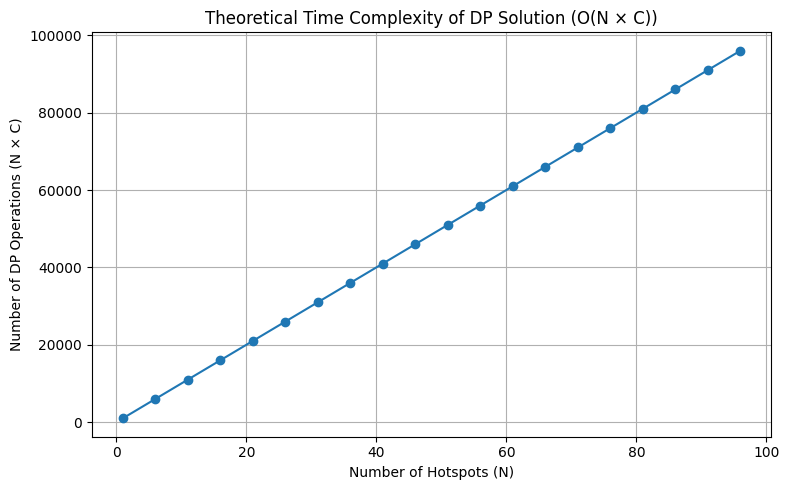

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Variables
battery_capacity = 1000  # C (fixed in our case)
N_values = np.arange(1, 101, 5)  # Try 1 to 100 hotspots, step 5

# Theoretical operations = N * C
operations = N_values * battery_capacity

# Plot
plt.figure(figsize=(8, 5))
plt.plot(N_values, operations, marker='o')
plt.title('Theoretical Time Complexity of DP Solution (O(N × C))')
plt.xlabel('Number of Hotspots (N)')
plt.ylabel('Number of DP Operations (N × C)')
plt.grid(True)
plt.tight_layout()
plt.show()


# d). Implementation

In [36]:
def dp_max_priority(hotspots, battery_capacity):
    """
    Solves the drone pollution cleanup problem using dynamic programming.
    Returns the maximum priority score and the subset of hotspot indices included in the optimal solution.
    """
    N = len(hotspots)
    # DP table: rows for hotspots, columns for all possible energy budgets
    dp = [[0] * (battery_capacity + 1) for _ in range(N + 1)]
    # Table to track choices for reconstruction
    choice = [[False] * (battery_capacity + 1) for _ in range(N + 1)]

    # Populate the DP and choice tables
    for i in range(1, N + 1):
        priority = hotspots[i-1][1]      # Priority score
        cleaning = hotspots[i-1][2]      # Cleaning effort
        travel = hotspots[i-1][3]        # Round-trip travel cost
        total_cost = cleaning + travel   # Total energy needed for this hotspot

        for j in range(battery_capacity + 1):
            if total_cost > j:
                # Can't include this hotspot, inherit value from above
                dp[i][j] = dp[i-1][j]
                choice[i][j] = False
            else:
                # Option 1: Exclude this hotspot
                exclude = dp[i-1][j]
                # Option 2: Include this hotspot
                include = dp[i-1][j - total_cost] + priority
                # Choose the better option
                if exclude >= include:
                    dp[i][j] = exclude
                    choice[i][j] = False
                else:
                    dp[i][j] = include
                    choice[i][j] = True

    # Backtrack to find which hotspots were included
    selected = []
    j = battery_capacity
    for i in range(N, 0, -1):
        if choice[i][j]:
            selected.append(i-1)  # Store original index (0-based)
            j -= hotspots[i-1][2] + hotspots[i-1][3]
    selected.reverse()  # Optional: to get increasing order

    max_priority = dp[N][battery_capacity]
    return max_priority, selected

# --- Example usage with sample data ---
max_score, selected_indices = dp_max_priority(hotspots, battery_capacity)
print("Maximum Priority Score:", max_score)
print("Selected Hotspot Indices:", selected_indices)


Maximum Priority Score: 1949
Selected Hotspot Indices: [1, 10, 14, 16, 21, 27, 30, 32, 36, 38, 44, 47, 50, 56, 61, 67, 68, 70, 76, 80, 81, 84, 88, 90, 96]


# e). Testing Algorithm

In [33]:
import time

start_time = time.time()
max_score, selected_indices = dp_max_priority(hotspots_20, battery_capacity)
end_time = time.time()

elapsed_time = end_time - start_time

print("Maximum Priority Score:", max_score)
print("Selected Hotspot Indices:", selected_indices)
print(f"Elapsed Time: {elapsed_time:.4f} seconds")


Maximum Priority Score: 1415
Selected Hotspot Indices: [0, 1, 3, 4, 6, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18]
Elapsed Time: 0.0035 seconds


# f). Practical Time Complexity

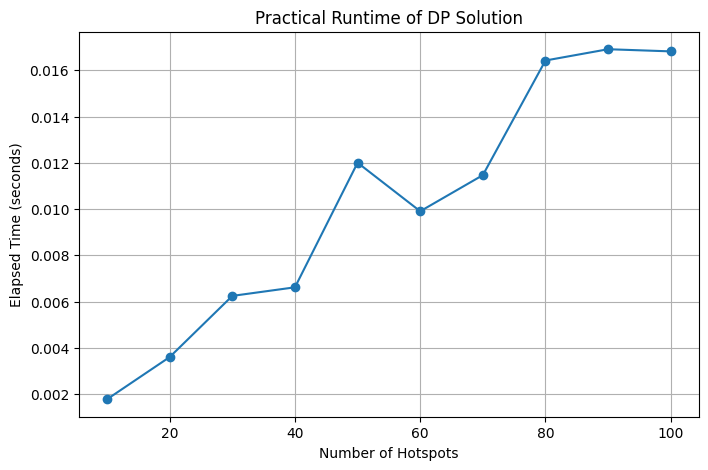

In [34]:
import matplotlib.pyplot as plt

sizes = list(range(10, 101, 10))
times = []

for size in sizes:
    test_hotspots = hotspots[:size]
    start = time.time()
    _ = dp_max_priority(test_hotspots, battery_capacity)
    times.append(time.time() - start)

plt.figure(figsize=(8,5))
plt.plot(sizes, times, marker='o')
plt.xlabel('Number of Hotspots')
plt.ylabel('Elapsed Time (seconds)')
plt.title('Practical Runtime of DP Solution')
plt.grid(True)
plt.show()


# g). Trade-Offs

> **Brute-force Approach:**  
> The brute-force method systematically enumerates all possible subsets of hotspots, checking which combination yields the maximum total priority score without exceeding the energy budget. Its time complexity is O(2^N), where N is the number of hotspots, making it computationally infeasible for large N (e.g., more than 20–25 hotspots). While this approach guarantees optimality, the exponential growth in computation means it is only practical for very small instances. Space usage is relatively modest, as only the best solution and the current subset need to be tracked at each recursive call.
>
> **Greedy Approach:**  
> The greedy method (if implemented for this problem) would select hotspots based on a heuristic, such as the highest priority-to-cost ratio, until the energy budget is reached. Its time complexity is typically O(N log N) (mainly due to sorting), and space complexity is O(N). The greedy algorithm is extremely fast and can handle large datasets. However, it does not guarantee optimality for 0/1 Knapsack-type problems, since locally optimal choices can lead to suboptimal overall solutions.
>
> **Dynamic Programming (DP) Approach:**  
> The DP solution, modeled after the 0/1 Knapsack algorithm, uses a table to systematically build up solutions to subproblems, with time and space complexity of O(N × C), where C is the battery capacity. For the project’s constraints (N up to 100, C = 1000), this approach is both feasible and efficient in practice, as demonstrated by the timing experiments. DP guarantees an optimal solution while remaining practical for the given input size. However, for very large values of C (e.g., millions), the space and time requirements can still become significant.
>
> **Summary:**  
> The brute-force approach, while always optimal, is only usable for very small input sizes due to its exponential complexity. The greedy approach is extremely fast but cannot guarantee optimality in all cases. Dynamic programming strikes the best balance for this problem, combining guaranteed optimality with efficient and practical performance for the problem’s real-world scale.
